# Assignment 1  

For the exercises below you can use the numpy and scipy libraries.

## Problem 1: Simulation (20 points)

Review any of the probability theory links [provided in your course site](https://pantelis.github.io/artificial-intelligence/aiml-common/lectures/ml-math/probability/index.html). The exercise refers to Example 6.6 of the  [Math for ML book](https://mml-book.github.io/book/mml-book.pdf).

### Problem 1A (15 points)

Simulate (sample from) the bivariate normal distribution with the shown parameters obtaining a plot similar to Figure 6.8b that shows the simulation result from a different bivariate Gaussian distribution.  You can generate $m=200$ samples/points (10 points)

### Problem 1B (5 points)

Plot the contours of the bivariate Gaussian distribution and the simulated points in the same plot. (5 points)

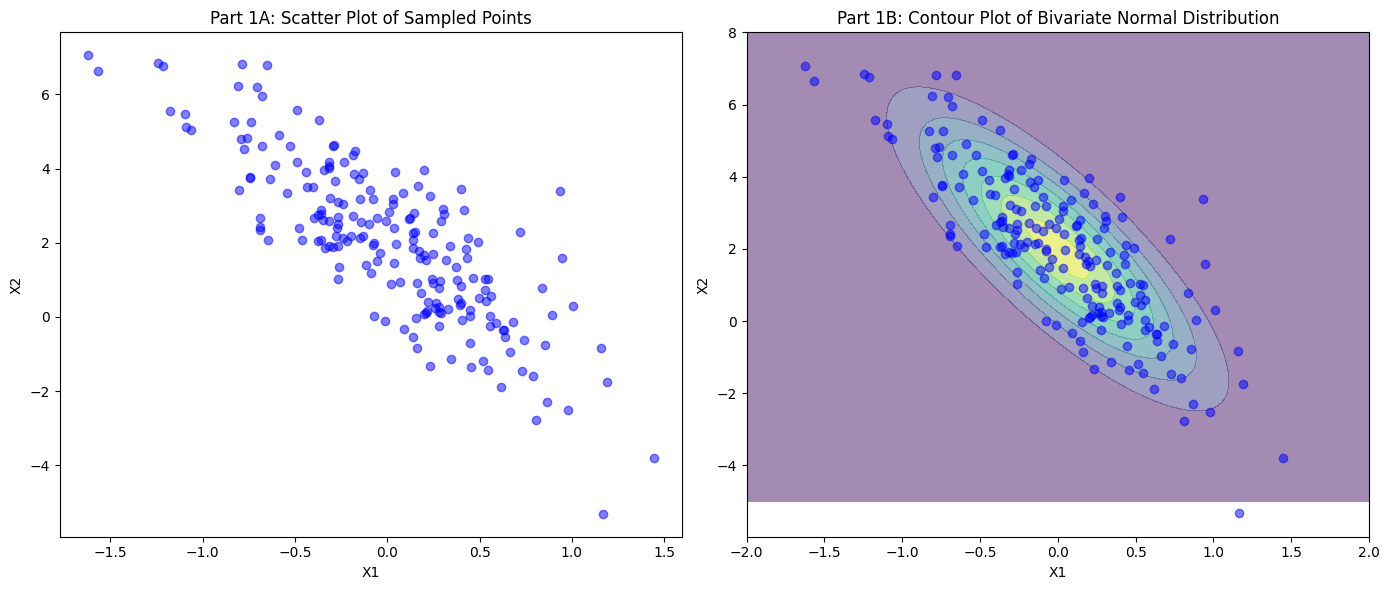

In [34]:
# Insert your answer here and fee free to add markdown cells as needed
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

np.random.seed(42)
mean = [0, 2]
covariance = [[0.3, -1], [-1, 5]]

samples = multivariate_normal.rvs(mean=mean, cov=covariance, size=200)
f1, f2 = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-5, 8, 100))
pdf = multivariate_normal(mean=mean, cov=covariance).pdf(np.dstack((f1, f2)))

fig, plot = plt.subplots(1, 2, figsize=(14, 6))

plot[0].scatter(samples[:, 0], samples[:, 1], color='blue', alpha=0.5)
plot[0].set_title('Part 1A: Scatter Plot of Sampled Points')
plot[0].set_xlabel('X1')
plot[0].set_ylabel('X2')

contour = plot[1].contourf(f1, f2, pdf, alpha=0.5)
plot[1].scatter(samples[:, 0], samples[:, 1], color='blue', alpha=0.5)
plot[1].set_title('Part 1B: Contour Plot of Bivariate Normal Distribution')
plot[1].set_xlabel('X1')
plot[1].set_ylabel('X2')
plt.tight_layout()
plt.show()

## Problem 2: Projection (20 points)

You may want to review these [linear algebra](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab) videos or the [other linear algebra links](https://pantelis.github.io/artificial-intelligence/aiml-common/lectures/ml-math/linear-algebra/index.html) provided in your course site.

Simulate a 3-dimensional (3d) Gaussian random vector with the following covariance matrix by sampling m = 1000 3D vectors from this distribution.

$$
\begin{bmatrix}
4 & 2 & 1 \\
2 & 3 & 1.5 \\
1 & 1.5 & 2 \\
\end{bmatrix}
$$

Using the Singular Value Decomposition (SVD) of the covariance matrix compute the projection of the m simulated vectors onto the subspace spanned by the first two principal components (or left singular vectors of the covariance matrix).

### Problem 2A (5 points)

What determines the principal components ? Show the vectors which denote the first 2 principal components.

### Problem 2B (5 points)

Plot the projected vectors in the subspace of first 2 principal components.

### Problem 2C (10 points)

Reverse the projection to map back to the original 3D space and create a scatter plot to show the reconstructed points. Do the reconstructed points have identical/similar but not identical/different correlations in respective components as the original matrix?



Part 2A: The principal components are determined by the singular value decomposition of the data matrix
First principal component: [-0.70173922 -0.60421021 -0.37748125]
Second principal component: [ 0.68097512 -0.41315066 -0.60463164]


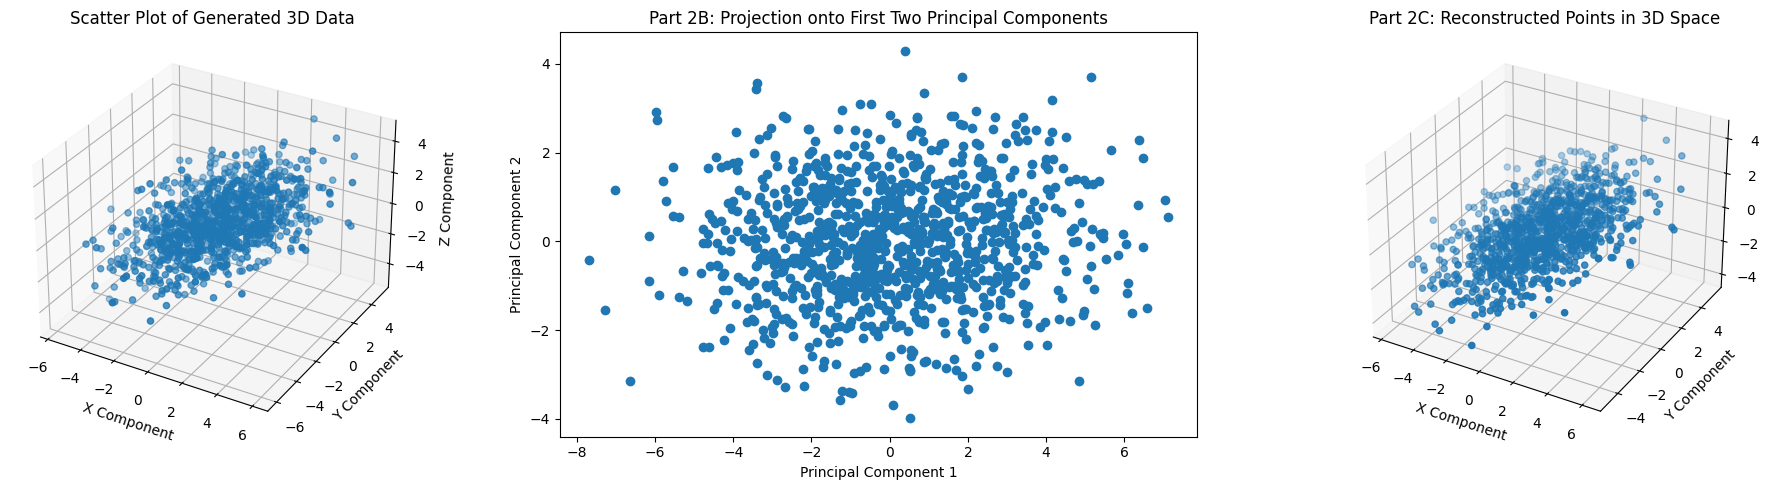

In [19]:
# Insert your answer here and fee free to add markdown cells as needed
import numpy as np
import matplotlib.pyplot as plt

matrix = np.array([[4, 2, 1], [2, 3, 1.5], [1, 1.5, 2]])

data = np.random.multivariate_normal(mean=[0, 0, 0], cov=matrix, size=1000)
fig = plt.figure(figsize=(20, 5))
plot1 = fig.add_subplot(131, projection='3d')
plot1.scatter(data[:, 0], data[:, 1], data[:, 2])
plot1.set_xlabel('X Component')
plot1.set_ylabel('Y Component')
plot1.set_zlabel('Z Component')
plot1.set_title('Scatter Plot of Generated 3D Data')

U, S, V = np.linalg.svd(matrix)

principal_components = U[:, :2]
print("Part 2A: The principal components are determined by the singular value decomposition of the data matrix")
print("First principal component:", principal_components[:, 0])
print("Second principal component:", principal_components[:, 1])

projected_data = data.dot(principal_components)
plot2 = fig.add_subplot(132)
plot2.scatter(projected_data[:, 0], projected_data[:, 1])
plot2.set_xlabel('Principal Component 1')
plot2.set_ylabel('Principal Component 2')
plot2.set_title('Part 2B: Projection onto First Two Principal Components')


reconstructed_data = projected_data.dot(principal_components.T)
plot3 = fig.add_subplot(133, projection='3d')
plot3.scatter(reconstructed_data[:, 0], reconstructed_data[:, 1], reconstructed_data[:, 2])
plot3.set_xlabel('X Component')
plot3.set_ylabel('Y Component')
plot3.set_zlabel('Z Component')
plot3.set_title('Part 2C: Reconstructed Points in 3D Space')
plt.tight_layout()
plt.show()

**The Reconstructed points in 3D space are similar to the original data as the principal components maintain most of the information of the data**

### Problem 3: Stochastic Gradient Descent (30 points)

In class we covered the baseline stochastic gradient descent.  Using the [linear regression example from the class notes](https://pantelis.github.io/artificial-intelligence/aiml-common/lectures/regression/linear-regression/linear_regression.html), develop from scratch the baseline SGD algorithm. :

Clearly state the hyperparameters you used and present the loss vs epoch plot that demonstrates the convergence of the algorithm.

I used the following hyperparameters:
1. Hypothosis Degree- Polynomial of degree 4
2. Learning Rate- 0.01
3. Epochs- 1000
4. mini_batch_size- 50

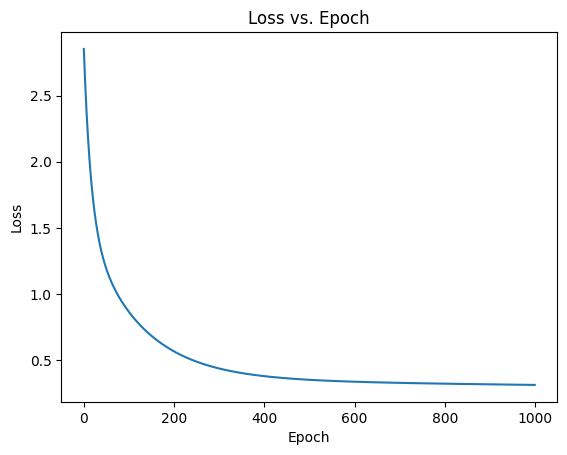

In [3]:
# Insert your answer here and fee free to add markdown cells as needed
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

def sgd(x_train, y_train, degree, learning_rate, epochs, batch_size):
    beta = np.random.randn(degree+1)
    losses = []
    indices = np.random.permutation(len(x_train))
    x_train_shuffled = x_train[indices]
    y_train_shuffled = y_train[indices]

    for epoch in range(epochs):
        num_batches = len(x_train) // batch_size
        epoch_losses = 0
        for i in range(num_batches):
            start_idx = i * batch_size
            end_idx = (i + 1) * batch_size
            x_batch = x_train_shuffled[start_idx:end_idx]
            y_batch = y_train_shuffled[start_idx:end_idx]
            X_batch = calculate_features(x_batch, degree)
            y_pred_batch = np.dot(X_batch, beta)
            loss = np.mean((y_pred_batch - y_batch)**2)
            epoch_losses += loss
            gradient = np.dot(X_batch.T, (y_pred_batch - y_batch)) / len(x_batch)
            beta -= learning_rate * gradient

        losses.append(epoch_losses/num_batches)
    return beta, losses


def calculate_features(x, degree):
    return np.vstack([x**i for i in range(0, degree+1)]).T

def create_toy_data(func, sample_size, std, domain=[0, 1]):
    x = np.linspace(domain[0], domain[1], sample_size)
    np.random.shuffle(x)
    y = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, y

def sinusoidal(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(sinusoidal, 100, 0.25)
x_test = np.linspace(0, 1, 50)
y_test = sinusoidal(x_test)

degree = 4
learning_rate = 0.01
epochs = 1000
mini_batch_size = 50
beta, losses = sgd(x_train, y_train, degree, learning_rate, epochs, mini_batch_size)

plt.plot(losses)
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

### Problem 4: SGD Enhancements (30 points)

In this exercise you will implement some enhancements to the implementation of Problem 3 (the linear regression problem) that can improve the convergence speed of the algorithm. Implement from scratch the following enhancements and compare the convergence speed of each algorithm to the baseline SGD algorithm

1. Momentum (15 points)
2. Adam (15 points)

Clearly state the hyperparameters you used and present the loss vs epoch plot that demonstrates the convergence of each algorithm and compared to the baseline SGD algorithm. You can include all plots in the same figure.

In this part as well I used the same following hyperparameters as previous:

Hypothosis Degree- Polynomial of degree 4

Learning Rate- 0.01

Epochs- 1000

mini_batch_size- 50

momentum - 0.9

decay rate for first moment estimate in Adam(beta1) - 0.9

decay rate for second moment estimate in Adam(beta1) - 0.999

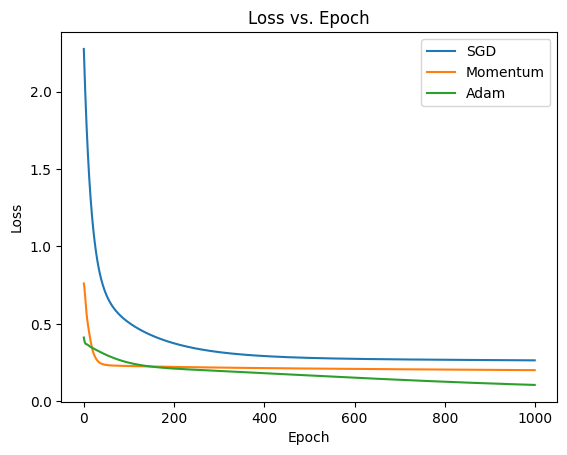

In [11]:
# Insert your answer here and fee free to add markdown cells as needed
np.random.seed(42)

def sgd_with_momentum(x_train, y_train, degree, learning_rate, epochs, batch_size, momentum=0.9):
    beta = np.random.randn(degree+1)
    losses = []
    velocity = np.zeros_like(beta)

    indices = np.random.permutation(len(x_train))
    x_train_shuffled = x_train[indices]
    y_train_shuffled = y_train[indices]

    for epoch in range(epochs):
        num_batches = len(x_train) // batch_size
        epoch_losses = 0
        for i in range(num_batches):
            start_idx = i * batch_size
            end_idx = (i + 1) * batch_size
            x_batch = x_train_shuffled[start_idx:end_idx]
            y_batch = y_train_shuffled[start_idx:end_idx]
            X_batch = calculate_features(x_batch, degree)
            y_pred_batch = np.dot(X_batch, beta)
            loss = np.mean((y_pred_batch - y_batch)**2)
            epoch_losses += loss
            gradient = np.dot(X_batch.T, (y_pred_batch - y_batch)) / len(x_batch)
            velocity = momentum * velocity + learning_rate * gradient
            beta -= velocity
        losses.append(epoch_losses/num_batches)
    return beta, losses

def sgd_with_adam(x_train, y_train, degree, learning_rate, epochs, batch_size, beta1=0.9, beta2=0.999):
    beta = np.random.randn(degree+1)
    losses = []
    m = np.zeros_like(beta)
    v = np.zeros_like(beta)
    t = 0

    indices = np.random.permutation(len(x_train))
    x_train_shuffled = x_train[indices]
    y_train_shuffled = y_train[indices]

    for epoch in range(epochs):
        num_batches = len(x_train) // batch_size
        epoch_losses = 0
        for i in range(num_batches):
            start_idx = i * batch_size
            end_idx = (i + 1) * batch_size
            x_batch = x_train_shuffled[start_idx:end_idx]
            y_batch = y_train_shuffled[start_idx:end_idx]
            X_batch = calculate_features(x_batch, degree)
            y_pred_batch = np.dot(X_batch, beta)
            loss = np.mean((y_pred_batch - y_batch)**2)
            epoch_losses += loss
            gradient = np.dot(X_batch.T, (y_pred_batch - y_batch)) / len(x_batch)
            t += 1
            m = beta1 * m + (1 - beta1) * gradient
            v = beta2 * v + (1 - beta2) * (gradient ** 2)
            m_hat = m / (1 - beta1 ** t)
            v_hat = v / (1 - beta2 ** t)
            beta -= learning_rate * m_hat / (np.sqrt(v_hat))
        losses.append(epoch_losses/num_batches)
    return beta, losses

beta_sgd, losses_sgd = sgd(x_train, y_train, degree, learning_rate, epochs, mini_batch_size)
beta_momentum, losses_momentum = sgd_with_momentum(x_train, y_train, degree, learning_rate, epochs, mini_batch_size)
beta_adam, losses_adam = sgd_with_adam(x_train, y_train, degree, learning_rate, epochs, mini_batch_size)

plt.plot(losses_sgd, label='SGD')
plt.plot(losses_momentum, label='Momentum')
plt.plot(losses_adam, label='Adam')
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**We can observe that by using Momentum or Adam, the algorithm converges must faster at earlier epochs which is expected behaviour.**